In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.mixture import GaussianMixture
from matplotlib.patches import Ellipse

# Load and select data
data = pd.read_excel('Fungus.xlsx', sheet_name='Sheet2', header=None)
X = data.iloc[76:276].to_numpy()

In [2]:
# Fit GMM with iteration tracking
gmm = GaussianMixture(n_components=4, covariance_type='full', max_iter=100, 
                      random_state=42, tol=1e-4)
gmm.fit(X)
labels = gmm.predict(X)
log_likelihoods = []
for i in range(gmm.n_iter_):
    gmm.max_iter = i + 1
    gmm.fit(X)
    log_likelihoods.append(gmm.score(X) * X.shape[0])

C:\Users\MANASWI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MANASWI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\MANASWI\anaconda3\Lib\site-packages\sklearn\mixture\_base.py:270: ConvergenceWarning: Best performing initialization did not converge. Try different init parameters, or increase max_iter, tol, or check for degenerate data.
  warnings.warn(
C:\Users\MANASWI\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less c

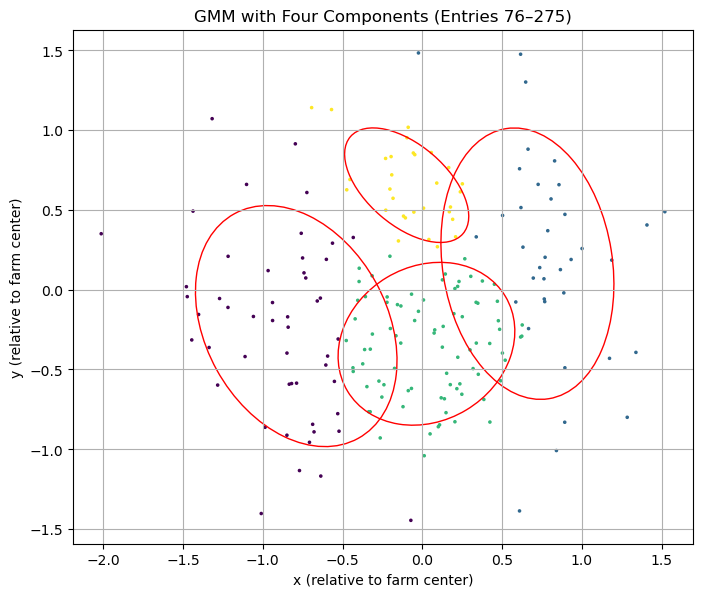

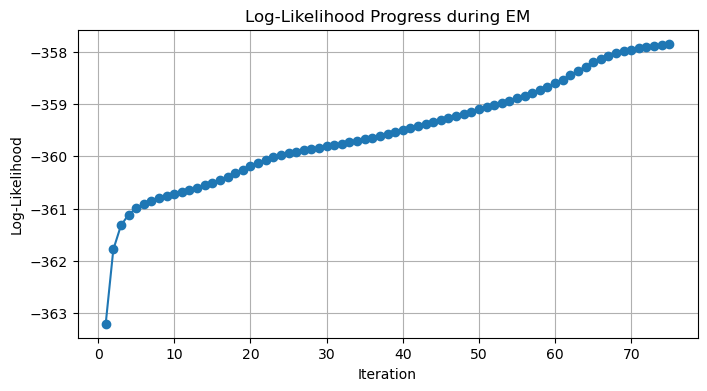

Mixing Coefficients: [0.2674387  0.22428988 0.38275183 0.12551959]
Means: [[-0.79022459 -0.22811596]
 [ 0.65829173  0.16290821]
 [ 0.02570087 -0.3389743 ]
 [-0.09819726  0.65465287]]
Covariances: [[[ 0.19936759 -0.06812416]
  [-0.06812416  0.28515253]]

 [[ 0.14686584 -0.03479989]
  [-0.03479989  0.36144195]]

 [[ 0.15331444  0.02171271]
  [ 0.02171271  0.13014637]]

 [[ 0.07563569 -0.03791893]
  [-0.03791893  0.06441314]]]


In [3]:
# Plot data with clusters and Gaussian ellipses
plt.figure(figsize=(8, 8))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', marker='.', s=10)
for k in range(4):
    mean = gmm.means_[k]
    cov = gmm.covariances_[k]
    v, w = np.linalg.eigh(cov)
    v = 2.0 * np.sqrt(2.0) * np.sqrt(v)  # 2 std devs for 95% confidence
    angle = np.arctan2(w[0, 1], w[0, 0]) * 180 / np.pi
    ell = Ellipse(xy=mean, width=v[0], height=v[1], angle=angle, 
                  edgecolor='red', fc='none', lw=1)
    plt.gca().add_patch(ell)
plt.xlabel('x (relative to farm center)')
plt.ylabel('y (relative to farm center)')
plt.title('GMM with Four Components (Entries 76–275)')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.savefig('gmm_fit.png')

# Plot log-likelihood progress
plt.figure(figsize=(8, 4))
plt.plot(range(1, gmm.n_iter_ + 1), log_likelihoods, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Log-Likelihood')
plt.title('Log-Likelihood Progress during EM')
plt.grid(True)
plt.savefig('likelihood_plot.png')
plt.show()

# Print parameters
print('Mixing Coefficients:', gmm.weights_)
print('Means:', gmm.means_)
print('Covariances:', gmm.covariances_)